<a href="https://colab.research.google.com/github/jlima11/Credit_Score/blob/main/Analise_de_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

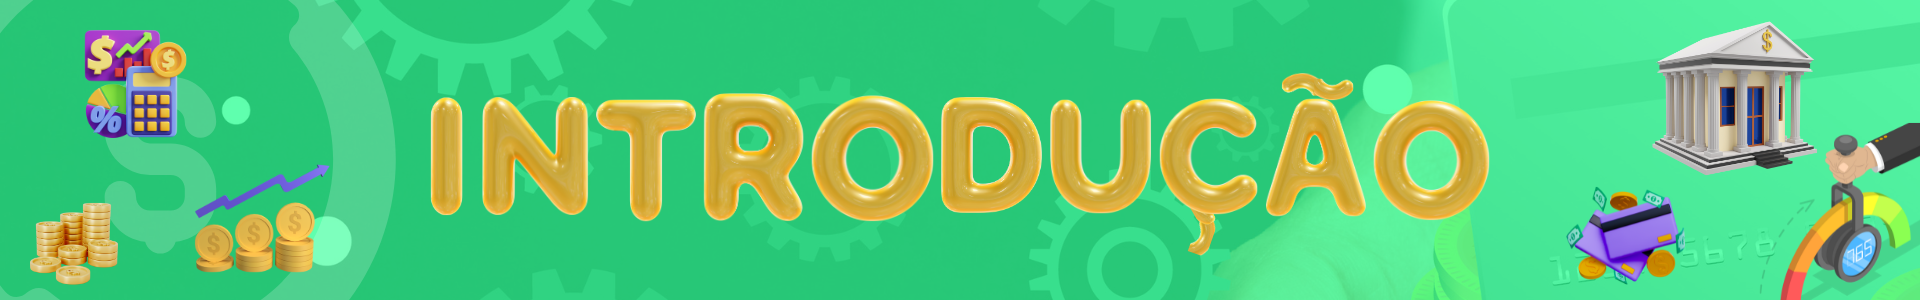

#📝 Introdução ao Score de Créditos 📊

O Score de Créditos é um indicador para entender a saúde financeira de uma pessoa. Ele representa uma pontuação numérica que reflete o risco de crédito de um indivíduo, que significa as chances de um indivíduo que tomou crédito do banco vir a se tornar um inadimplente. Neste notebook de Python, vamos explorar o que é o Score de Créditos, como é calculado e qual sua importância para as instituições financeiras e tomadores de crédito.

🔢 Como é calculado? O Score de Créditos é calculado com base em diversas informações financeiras, como histórico de pagamentos, dívidas em aberto, prazos de pagamento, entre outros fatores. Quanto mais alto for o score, maior a confiança das instituições em sua capacidade de pagamento.

🏦 Importância do Score de Créditos: Um bom score é vital para solicitar empréstimos, financiamentos ou até mesmo para obter melhores condições em compras a prazo. Ele pode influenciar nas taxas de juros oferecidas pelas instituições financeiras, impactando diretamente em suas decisões financeiras.

Um bom Score é resultado de:

*   Contas pagas em dia 📅
*   Cadastro atualizado 📝
*   Sem dívidas em atrado 🚫
*   Uso do crédito de forma consciente 💡



## 📚 Dataset

O Dataset é composto por 27 colunas, com atributos numéricos e não numéricos.

* ID - Unique Identification
* Customer_ID - Unique identification of a individual
* Month - Mês do ano
* Name - Nome da pessoa
* Age - Idade
* SSN - Número de Seguro Social
* Occupation - Ocupação
* Annual_Income - Ganho Anual
* Monthly_Inhand_Salary - Salário Mensal
* Num_Bank_Accounts - Número de contas de banco
* Num_Credit_Card - Número de carrtões de crédito
* Interest_Rate - Taxa de Juros do cartão
* Num_of_Loan - Número de dívidas com o banco
* Type_of_Loan - Tipo de divida
* Delay_from_due_date - Média de dias de atraso de pagamento
* Num_of_Delayed_Payment - Numero de pagamentos atrasados
* Changed_Credit_Limit - Representa a variação percentual no limite do cartão de crédito
* Num_Credit_Inquiries - Número de transações com cartão de crédito
* Credit_Mix - Classificação do crédito
* Outstanding_Debt - Dívidas a serem pagas
* Credit_Utilization_Ratio - Média do uso do cartão de crédito
* Credit_History_Age - Tempo que usa crédito
* Payment_of_Min_Amount - Representa a pessoa que só pagou o valor mínimo
* Total_EMI_per_month - Pagamentos mensais de EMI
* Amount_invested_monthly - Quantia investida
* Payment_Behaviour - Comportamento de pagamento
* Monthly_Balance - Balanço mensal
* Credit Score (Target) - Classificação  (Poor, Standard, Good)

## 🔧 Ferramentas e Bibliotecas

Será usado python, bibliotecas para análise dados, desenvolvimento e avaliação de modelos preditivos, serão usados:
* Pandas: For data manipulation and analysis.
* Matplotlib and Seaborn: For data visualization.
* Scikit-learn: For machine learning tasks, including data preprocessing, model training, and model evaluation. 🐼📊🔬


## 🎯 Objetivo

O principal objetivo é desenvolver um modelo preditivo que possa prever com eficácia o score de crédito com base nas características fornecidas. Ao aproveitar o poder do aprendizado de máquina, buscamos melhorar a precisão e o desempenho preditivo do modelo. 📈📉

## 📈 Workflow


**🔍 Carregamento e Pré-processamento de Dados**: Carregar os dados e prepará-los para análise e modelagem. Isso inclui lidar com valores ausentes. 📊🧹

**🔬 Análise Exploratória de Dados (EDA)**: Realizar análise exploratória de dados para obter insights sobre o conjunto de dados, entender as distribuições das características e explorar possíveis relações entre as características e os resultados das doenças. 📊📉

**💡 Limpeza de Dados**: Realizar limpeza e transformação dos dados para melhorar o desempenho do modelo. Isso inclui preencher valores ausentes e normalizar características numéricas. 🔬

**🧪 Engenharia de Características**: Criar novas características aplicando conhecimentos do modelo às características existentes, váriáveis dummy, normalização e outras técnicas de padronização. 🔬

**📚 Treinamento e Validação do Modelo**: Treinar o modelo usando uma estratégia de divisão entre treinamento e teste e fazer previsões no conjunto de teste. 🧪🔍

**📊 Avaliação do Modelo**: Avaliar o desempenho do modelo treinado usando métricas apropriadas de avaliação, como matriz de confusão, curva ROC e curva Precisão-Recall, e verificar a capacidade do modelo de generalizar para dados não vistos usando o conjunto de teste. 🔍✅

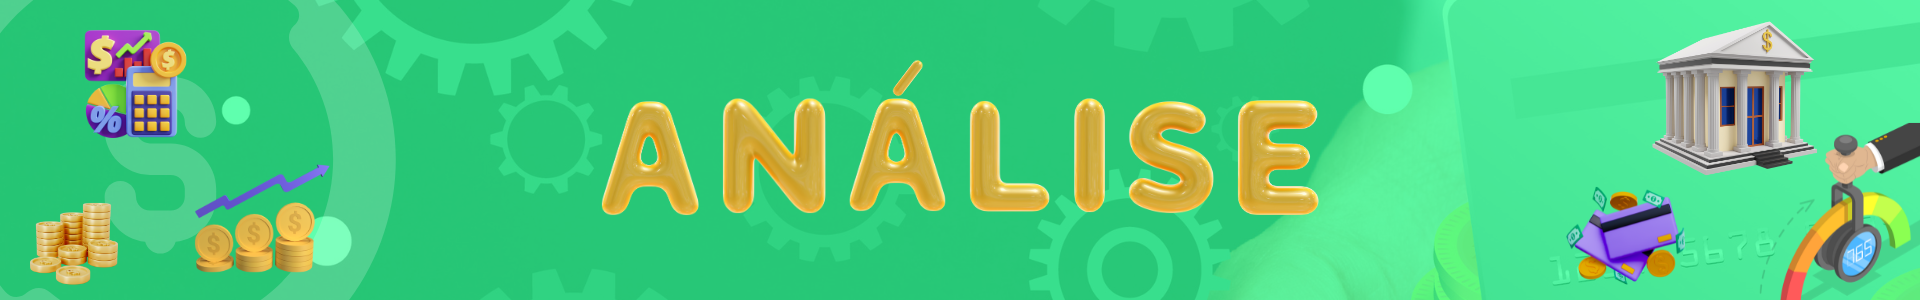

# 1. ⚙️ Carregamento e Pré-processamento

## 1.1 📚 Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1.2 🎲 Dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/credit_score_dataset.csv')

<ipython-input-2-0d0f46c98f2d>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/dataset/credit_score_dataset.csv')


## 1.3 📜 Descrição

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**⚠️ Alguma váriáveis precisam de atenção** para serem tratadas, já que possuem valores nulos, são elas: Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance.

In [4]:
dataset.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

⚠️ Alguma váriáveis precisam de atenção para serem tratadas, já que possuem valores que não significam nada e podem ser considerados como nulo, como é o exemplo do primeiro valor do campo Credit_Mix que é igual a "_", que não siginifica nada.

In [5]:
dataset.describe() #númericos

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [6]:
dataset.describe(include=object) #não numéricos

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

Aqui é possível notar que das 100000 dívidas, temos 12500 pessoas (Customer_ID) que as possuem, logo, entende-se que uma pessas pode ter mais de uma dívida, mas é importante averiguar se existem linhas dúplicadas, já que existem muitos valores contínuos, as chances de haverem linhas iguais é próxima a 0.

## 1.4 Valores Nulos

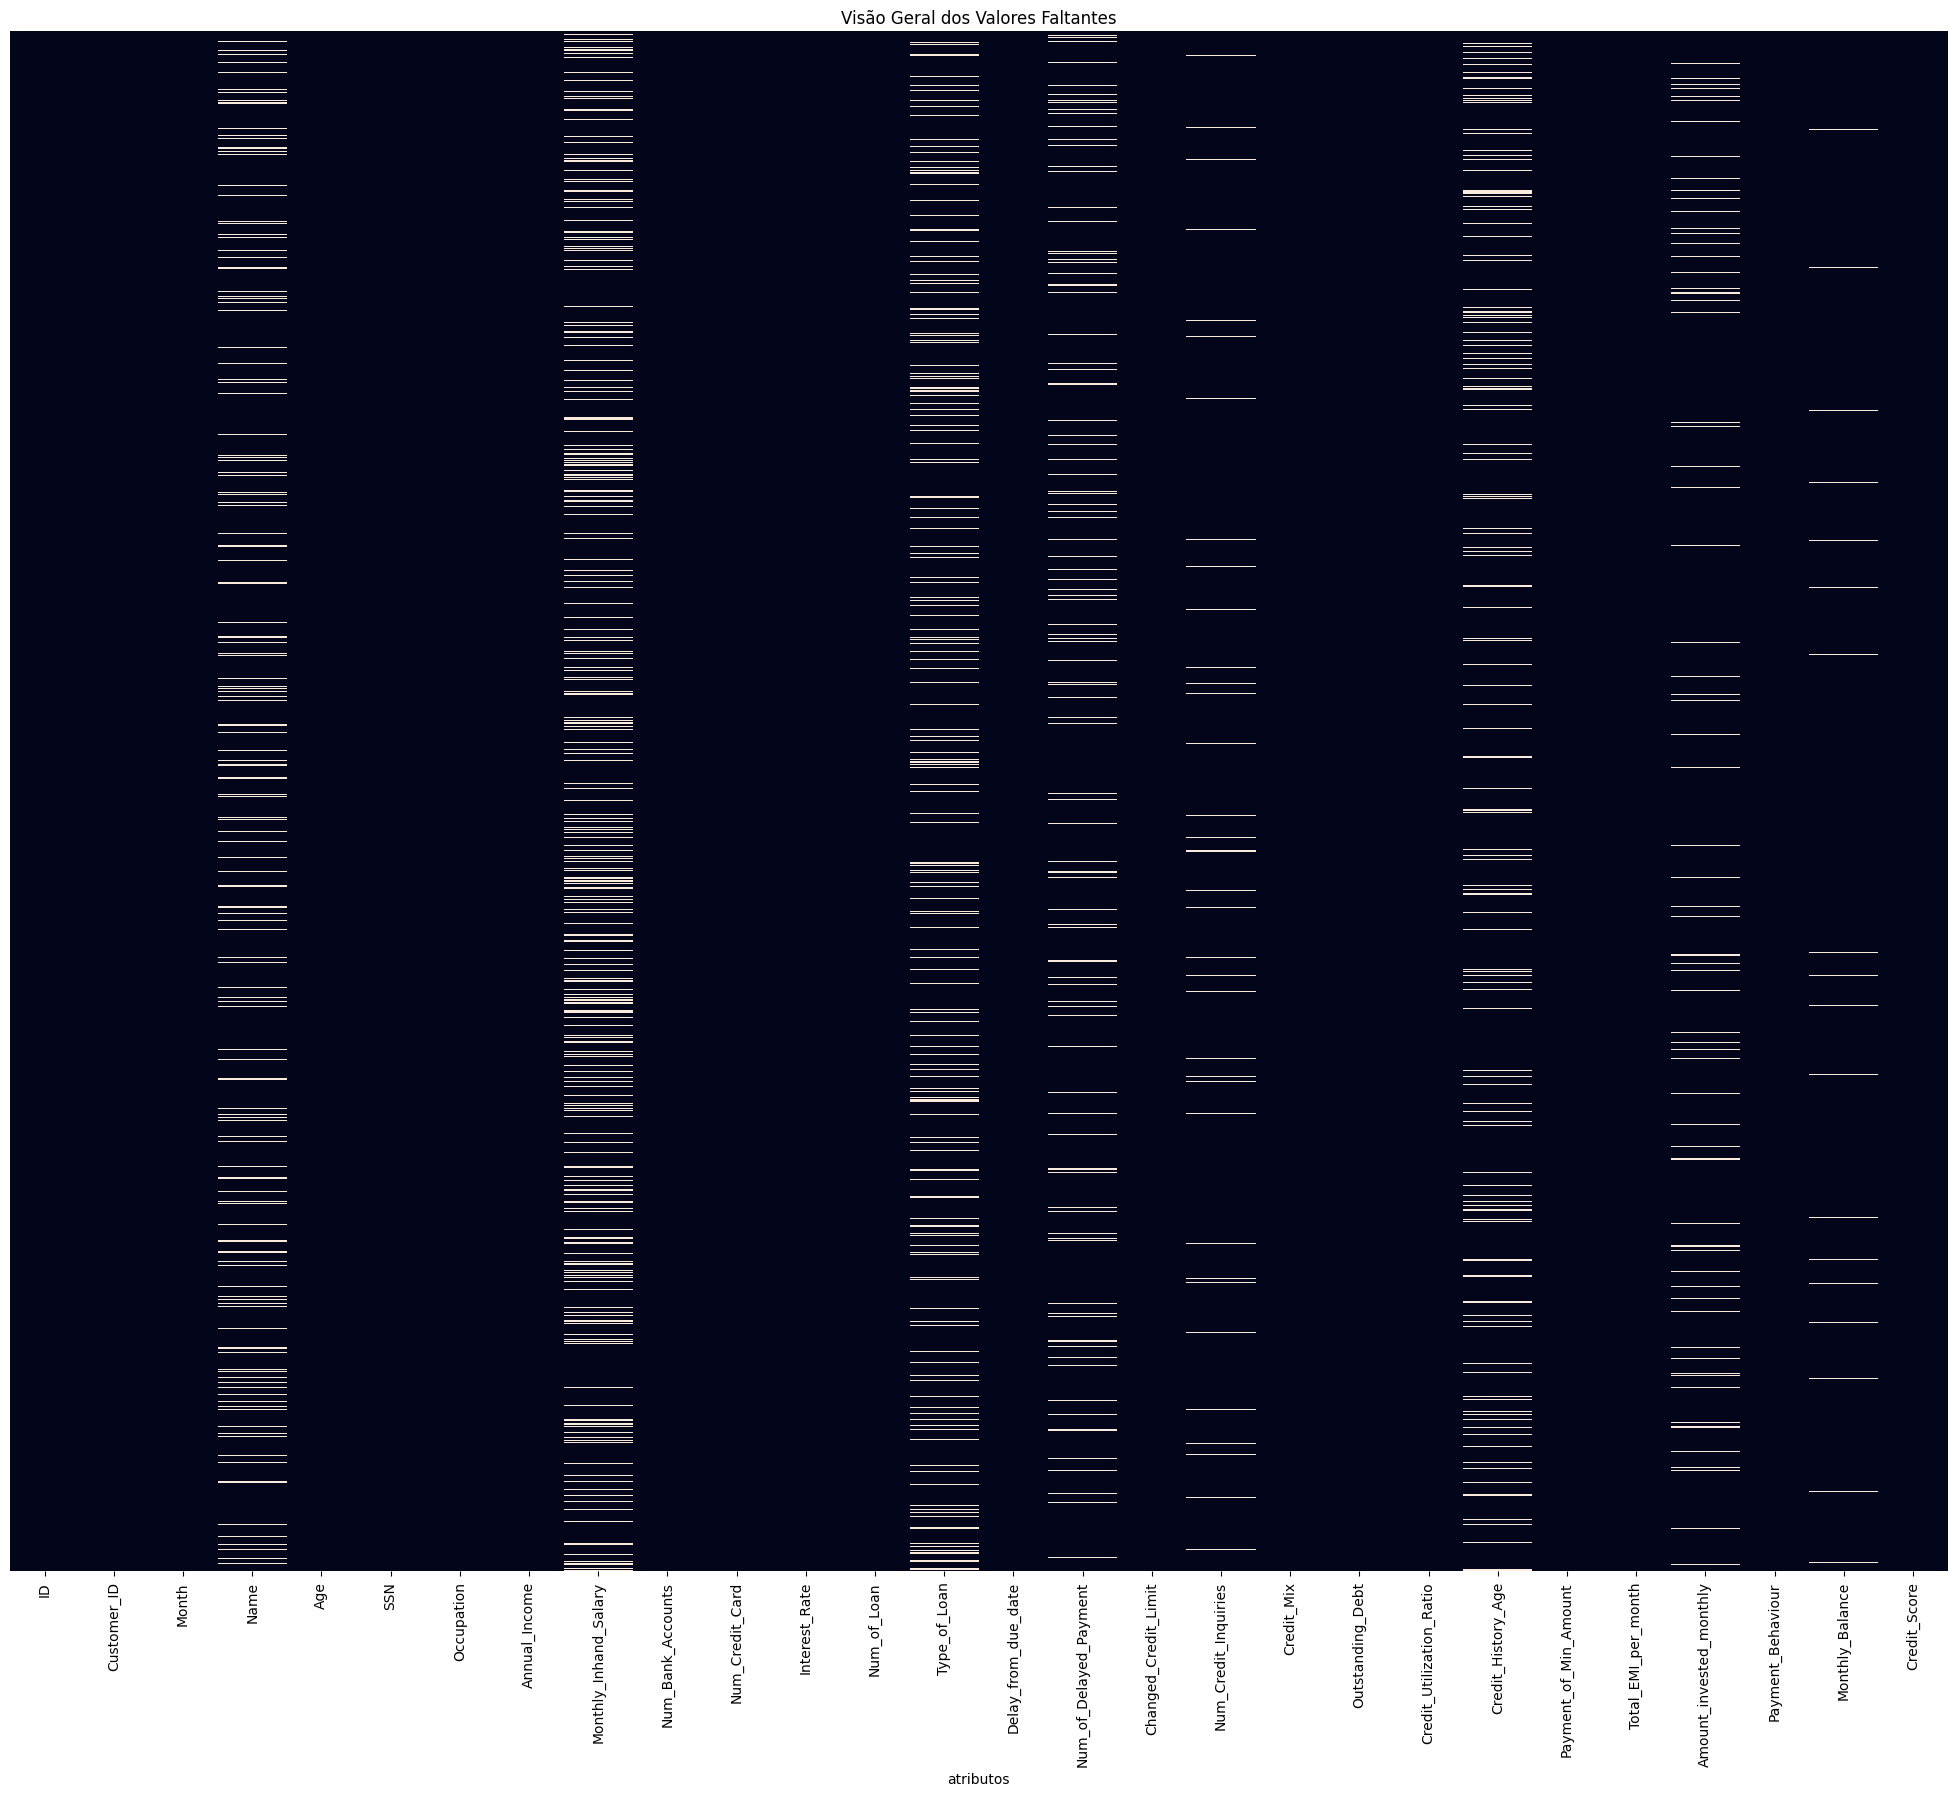

In [7]:
#Visão de valores faltantes
plt.figure(figsize=(25,20))
sns.heatmap(dataset.isnull(),
           yticklabels=0,
           cbar=False)
plt.title('Visão Geral dos Valores Faltantes')
plt.xlabel('atributos')
plt.show()

É importante entender o que os dados nulos são, pois tanto podem realmente ser uma falha de preenchimento quanto significar algo, as vezes podem representar o 0 ou categorias como "Não tem", esses também possuem significado, tendo isso em vista, é necessário ponderar quais valores nulos serão excluidos e quais serão transformados em valores. Mas é possível entender que valores Nulos em Name são falhas de preenchimento, apesar de Name não acrescentar para contrução do modelo.

Cometário sobre as colunas com valores nulos.


*   Name - Nesse caso é realmente um erro, porém essa coluna não agrega em nada na análise, logo, pode-se ignorar, pois será esxluída.
*   Coluna Monthly_Inhad_Salary - Agrega muita informação, é preciso deixar claro que nem todas intituições financeiras sabem o quanto uma pessoa ganha, logo pode substituir o valor nulo pela mediana para não desbalancear o cenário.
* Type of loan - Agrega saber qual é o tipo de dívida? Segundo o [serasa](https://www.serasa.com.br/score/blog/score-de-credito/), o impacto no score é muito atrelado ao valor e ao tempo, então, como tempos, logo, pode-se excluir o tipo de dívida sem perca de valor, mas será mantido para análise de correlação.
* Number of Delayed Payment - O número de pagamento atrasado pode ser substituído pela informação de dívida total.
* Number of Credit Inquiries - O número de solicitações de crédito pode ter relevância, mas não há perca de informação qando temos a dívida.
* Tempo que usa crédito influencia no score, será substituido pela mediana.
* Investimentos podem influencia score, mas nem todos têm, então pode-se substituir o valores vazios pela mediana.
* Balanço financeiro temm pouco impacto então po ser ignorado.




## 1.5 Valores Duplicados

In [8]:
linhas_duplicadas = dataset[dataset.duplicated()]
num_linhas_duplicadas = len(linhas_duplicadas)
print("\nNúmero de Linhas Duplicadas:", num_linhas_duplicadas)


Número de Linhas Duplicadas: 0


##1.6 Outliers

O boxplot é uma representação gráfica que fornece uma visão resumida da distribuição estatística de um conjunto de dados. Ele é especialmente útil em análises exploratórias de dados e em Machine Learning por várias razões:

Identificação de Outliers: O boxplot é eficaz na identificação de outliers, que são valores atípicos que podem influenciar negativamente modelos de Machine Learning.

Resumo Estatístico: Fornece um resumo visual dos principais estatísticas descritivas, como quartis, mediana e a amplitude interquartil (IQR).

Comparação de Distribuições: Permite comparar facilmente as distribuições de diferentes variáveis ou grupos, ajudando a entender padrões e diferenças nos dados.

Parâmetros do Boxplot:

Caixa (Box): Representa o IQR (amplitude interquartil), mostrando onde está concentrada a maioria dos dados.

Linha Mediana (Mediana): Indica a posição central dos dados.

Bigodes (Whiskers): Representam a extensão dos dados dentro de um intervalo específico, geralmente 1,5 vezes o IQR.

Outliers: Pontos fora dos bigodes, indicando valores considerados atípicos.

Importância para Modelos de ML:

Identificação de Anomalias: O boxplot ajuda a identificar e tratar valores anômalos, evitando que eles influenciem negativamente a performance do modelo.

Seleção de Variáveis: Ao visualizar boxplots de diferentes variáveis, é possível identificar quais apresentam maior variabilidade e, portanto, podem ser mais informativas para o modelo.

Validação de Modelos: O boxplot é uma ferramenta útil durante a validação de modelos, permitindo a análise da distribuição de resíduos e a identificação de possíveis problemas.

In [9]:
#Função boxplot
def plotar_boxplot(df, colunas):
    # Crie um boxplot para cada coluna na lista
    for coluna in colunas:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[coluna])
        plt.title(f'Boxplot para a coluna "{coluna}"')
        plt.show()

In [10]:
df_num = dataset[['Interest_Rate',	'Delay_from_due_date',	'Credit_Utilization_Ratio']]

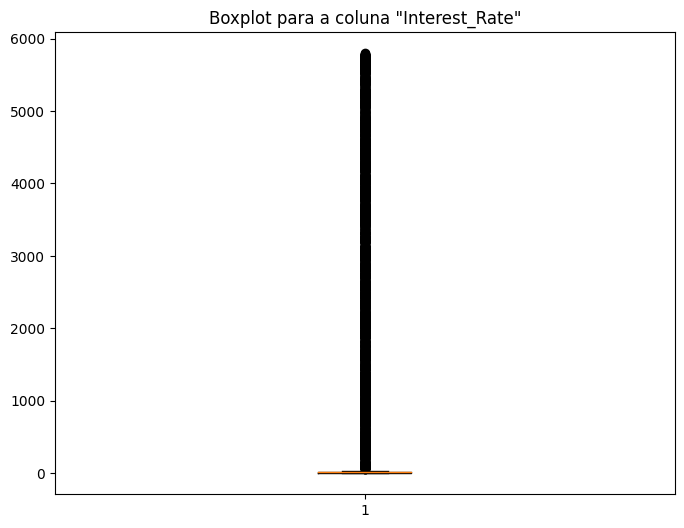

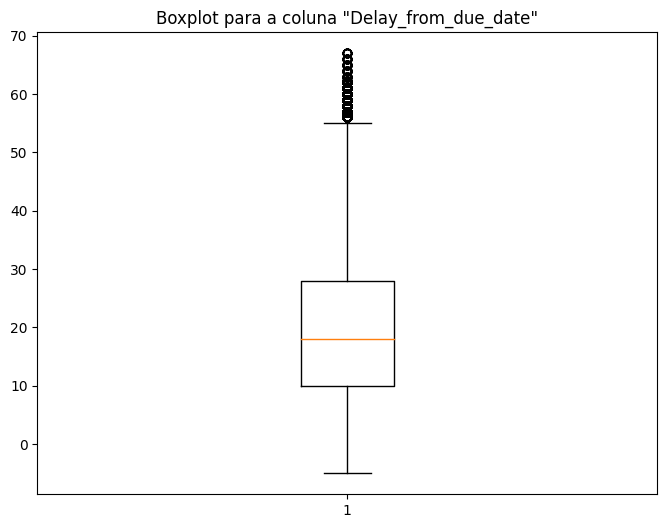

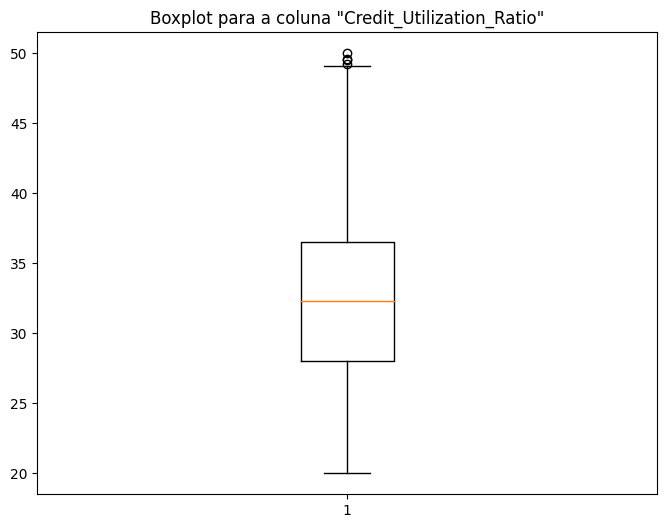

In [11]:
plotar_boxplot(dataset, df_num)

Necessário tratar:
* Month_inhad_salary e Total_EMI_per_month

#2.Limpeza de Dados e Tratamento 🧹

Limpeza que será realizada será:
* Excluir colunas que não agregam informações.
* Tratar dados nulos, fazendo a substituição por valores condizentes.
* Excluir outliers de distribuições com outliers muitos distantes do boxplot.

##2.1 Exluir colunas que não agregam valor ou que vazam dados.

In [12]:
colunas_para_excluir = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Type_of_Loan', 'Total_EMI_per_month']
dataset = dataset.drop(colunas_para_excluir, axis=1)

##2.2 Substituir Dados Nulos

In [13]:
datset = dataset.fillna(dataset.median())

<ipython-input-13-7e36b32950d0>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datset = dataset.fillna(dataset.median())


##2.3 Correção de preenchimento e metadados

In [14]:
def identificar_nao_numericos_em_varias_colunas(df, colunas):
    nao_numericos = pd.DataFrame()

    for coluna in colunas:
        # Tentar converter a coluna para números
        df[f'{coluna}_Numerico'] = pd.to_numeric(df[coluna], errors='coerce')

        # Identificar os valores não numéricos
        nao_numericos_coluna = df[df[coluna] != df[f'{coluna}_Numerico']][coluna]

        # Adicionar à tabela geral de não numéricos
        nao_numericos = pd.concat([nao_numericos, nao_numericos_coluna], axis=1)

    return nao_numericos

In [15]:
colunas_nn = ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

In [16]:
identificar_nao_numericos_em_varias_colunas(dataset,colunas_nn)

Num_of_Delayed_Payment  Num_Credit_Inquiries      Credit_History_Age  \
0                          7                   NaN   22 Years and 1 Months   
1                        NaN                   NaN                     NaN   
2                          7                   NaN   22 Years and 3 Months   
3                          4                   NaN   22 Years and 4 Months   
4                        NaN                   NaN   22 Years and 5 Months   
...                      ...                   ...                     ...   
99995                      7                   NaN   31 Years and 6 Months   
99996                      7                   NaN   31 Years and 7 Months   
99997                      6                   NaN   31 Years and 8 Months   
99998                    NaN                   NaN   31 Years and 9 Months   
99999                      6                   NaN  31 Years and 10 Months   

      Amount_invested_monthly     Monthly_Balance  
0           80.41529543900253  312.49408867943663  
1          118.28022162236736  284.62916249607184  
2             81.699521264648   331.2098628537912  
3           199.4580743910713  223.45130972736786  
4          41.420153086217326  341.48923103222177  
...                       ...                 ...  
99995       60.97133255718485                 NaN  
99996       54.18595028760385                 NaN  
99997       24.02847744864441                 NaN  
99998      251.67258219721603                 NaN  
99999       167.1638651610451                 NaN  

[100000 rows x 5 columns]

In [17]:
import re

In [18]:
# Garantir que a coluna seja tratada como string
dataset['Credit_History_Age'] = dataset['Credit_History_Age'].astype(str)

# Extrair o primeiro número antes de "Years"
dataset['Credit_History_Age'] = dataset['Credit_History_Age'].apply(lambda x: int(re.search(r'(\d+)', x).group(1)) if re.search(r'(\d+)', x) else 0)

# Imprimir o DataFrame com o novo valor extraído
print(dataset['Credit_History_Age'])

0        22
1         0
2        22
3        22
4        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: Credit_History_Age, Length: 100000, dtype: int64


In [19]:
dataset['Credit_History_Age'] = dataset['Credit_History_Age'].astype(int)

In [20]:
print(dataset['Credit_History_Age'])

0        22
1         0
2        22
3        22
4        22
         ..
99995    31
99996    31
99997    31
99998    31
99999    31
Name: Credit_History_Age, Length: 100000, dtype: int64


tratamento a seguir vai ser para excluir caracteres que estão ao redor do número, em totalidade são os _ (underline), para assegurar que essas colunas virem numéricas e os valores nulos sejam substituídos pela mediana.

In [21]:
dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].str.replace('_', '')


In [22]:
dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].fillna(dataset['Num_of_Delayed_Payment'].median())

In [23]:
dataset['Num_Credit_Inquiries'] = dataset['Num_Credit_Inquiries'].fillna(dataset['Num_Credit_Inquiries'].median())

In [24]:
dataset['Num_Credit_Inquiries'] = dataset['Num_Credit_Inquiries'].astype(int)

In [25]:
dataset['Amount_invested_monthly'] = dataset['Amount_invested_monthly'].str.replace('_', '')

In [26]:
dataset['Amount_invested_monthly'] = dataset['Amount_invested_monthly'].fillna(dataset['Amount_invested_monthly'].median())

In [27]:
dataset['Monthly_Balance'] = dataset['Monthly_Balance'].str.replace('_', '')

In [28]:
dataset['Monthly_Balance'] = dataset['Monthly_Balance'].fillna(dataset['Monthly_Balance'].median())

In [29]:
dataset['Age'] = dataset['Age'].str.replace('_', '')

In [30]:
dataset['Age'] = dataset['Age'].astype(int)

In [31]:
dataset['Num_of_Loan'] = dataset['Num_of_Loan'].str.replace('_', '')

In [32]:
dataset['Num_of_Loan'] = dataset['Num_of_Loan'].astype(int)

In [33]:
dataset['Outstanding_Debt'] = dataset['Outstanding_Debt'].str.replace('_', '')

In [34]:
dataset['Outstanding_Debt'] = dataset['Outstanding_Debt'].astype(float)

In [35]:
dataset['Amount_invested_monthly'] = dataset['Amount_invested_monthly'].astype(float)

In [36]:
dataset['Monthly_Balance'] = dataset['Monthly_Balance'].astype(float)

In [37]:
dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].astype(int)

In [38]:
dataset= dataset.drop(['Num_of_Delayed_Payment', 'Num_Credit_Inquiries_Numerico', 'Credit_History_Age_Numerico', 'Amount_invested_monthly_Numerico', 'Monthly_Balance_Numerico', 'Num_of_Delayed_Payment_Numerico'], axis=1)

In [39]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].str.replace('_', '')

In [40]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].str.replace(' ', '')

In [41]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].str.replace("", '0')

In [42]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].str.replace("'", '')

In [43]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].str.replace("-", '')

In [44]:
dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].astype(float)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Interest_Rate             100000 non-null  int64  
 2   Num_of_Loan               100000 non-null  int64  
 3   Delay_from_due_date       100000 non-null  int64  
 4   Changed_Credit_Limit      100000 non-null  float64
 5   Num_Credit_Inquiries      100000 non-null  int64  
 6   Credit_Mix                100000 non-null  object 
 7   Outstanding_Debt          100000 non-null  float64
 8   Credit_Utilization_Ratio  100000 non-null  float64
 9   Credit_History_Age        100000 non-null  int64  
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Amount_invested_monthly   100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  object 
 13  Monthly_Balance           100000 non-null  fl

In [46]:
dataset['Monthly_Balance'].describe()

count    1.000000e+05
mean    -3.000000e+22
std      3.162151e+24
min     -3.333333e+26
25%      2.718048e+02
50%      3.364493e+02
75%      4.635022e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

In [47]:
dataset.describe()

Age  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean      110.649700      72.466040       3.009960            21.068780   
std       686.244717     466.422621      62.647879            14.860104   
min      -500.000000       1.000000    -100.000000            -5.000000   
25%        24.000000       8.000000       1.000000            10.000000   
50%        33.000000      13.000000       3.000000            18.000000   
75%        42.000000      20.000000       5.000000            28.000000   
max      8698.000000    5797.000000    1496.000000            67.000000   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count         100000.000000         100000.000000     100000.000000   
mean             576.858999             27.326780       1426.220376   
std              644.688331            191.293766       1155.129026   
min                0.000000              0.000000          0.230000   
25%               40.090900              3.000000        566.072500   
50%               90.020500              6.000000       1166.155000   
75%             1040.060600              9.000000       1945.962500   
max             3060.090700           2597.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Amount_invested_monthly  \
count             100000.000000       100000.000000            100000.000000   
mean                  32.285173           16.344140               614.951381   
std                    5.116875            9.459708              1999.726647   
min                   20.000000            0.000000                 0.000000   
25%                   28.052567            9.000000                77.017414   
50%                   32.305784           17.000000               135.925682   
75%                   36.496663           24.000000               255.038698   
max                   50.000000           33.000000             10000.000000   

       Monthly_Balance  
count     1.000000e+05  
mean     -3.000000e+22  
std       3.162151e+24  
min      -3.333333e+26  
25%       2.718048e+02  
50%       3.364493e+02  
75%       4.635022e+02  
max       1.602041e+03

Necessário corrigir esses valores negativos, já que não existem ou não são importantes, nas colunas Age, Num_of_Loan, Delay_from_due_date
Também é necessário tratar os valores acima de

In [48]:
def substituir_negativos_pela_mediana(data, colunas):
    """
    Substitui valores negativos pela mediana em colunas específicas de um DataFrame.

    Parâmetros:
    - data: DataFrame do pandas contendo os dados.
    - colunas: Lista de nomes de colunas para as quais aplicar a substituição.
    """
    for coluna in colunas:
        # Verifica se a coluna existe no DataFrame
        if coluna in data.columns:
            # Calcula a mediana da coluna
            mediana_coluna = data[coluna].median()

            # Substitui os valores negativos pela mediana
            data[coluna] = np.where(data[coluna] < 0, mediana_coluna, data[coluna])

In [49]:
substituir_negativos_pela_mediana(dataset,['Age', 'Num_of_Loan'])

In [50]:
dataset['Delay_from_due_date'] = np.where(dataset['Delay_from_due_date'] < 0, 0, dataset['Delay_from_due_date'])

In [51]:
# como não tenho as caraccterísticas da população para específicar um idade máxima e idades acima de 100 anos são baixas as chances, vou apenas substituir essas idades pela mediana

In [52]:
dataset[dataset['Age'] > 100]['Age'].count()

1890

In [53]:
(dataset[dataset['Age'] > 100]['Age'].count()/len(dataset))*100

1.8900000000000001

Segundo o [IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18318-piramide-etaria.html), é próximo de 0% a quantidade de pessoas com mais de 100 anos, logo vou levar em consideração que esses preenchimento foram errados e igualar-los a mediana

In [54]:
dataset['Age'] = np.where(dataset['Age'] > 100, dataset['Age'].median(), dataset['Age'])

In [55]:
dataset.describe()

Age  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean       33.314300      72.466040       7.002240            21.081910   
std        10.628376     466.422621      59.139918            14.840204   
min        14.000000       1.000000       0.000000             0.000000   
25%        25.000000       8.000000       2.000000            10.000000   
50%        33.000000      13.000000       3.000000            18.000000   
75%        41.000000      20.000000       5.000000            28.000000   
max       100.000000    5797.000000    1496.000000            67.000000   

       Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
count         100000.000000         100000.000000     100000.000000   
mean             576.858999             27.326780       1426.220376   
std              644.688331            191.293766       1155.129026   
min                0.000000              0.000000          0.230000   
25%               40.090900              3.000000        566.072500   
50%               90.020500              6.000000       1166.155000   
75%             1040.060600              9.000000       1945.962500   
max             3060.090700           2597.000000       4998.070000   

       Credit_Utilization_Ratio  Credit_History_Age  Amount_invested_monthly  \
count             100000.000000       100000.000000            100000.000000   
mean                  32.285173           16.344140               614.951381   
std                    5.116875            9.459708              1999.726647   
min                   20.000000            0.000000                 0.000000   
25%                   28.052567            9.000000                77.017414   
50%                   32.305784           17.000000               135.925682   
75%                   36.496663           24.000000               255.038698   
max                   50.000000           33.000000             10000.000000   

       Monthly_Balance  
count     1.000000e+05  
mean     -3.000000e+22  
std       3.162151e+24  
min      -3.333333e+26  
25%       2.718048e+02  
50%       3.364493e+02  
75%       4.635022e+02  
max       1.602041e+03

##2.4 Excluir Outliers

In [56]:
# Identificar outliers usando o método IQR apenas nas colunas numéricas
for coluna in dataset.select_dtypes(include='float'):
    Q1 = dataset[coluna].quantile(0.25)
    Q3 = dataset[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Filtrar os dados, excluindo outliers
    dataset = dataset[(dataset[coluna] >= Q1 - 1.5 * IQR) & (dataset[coluna] <= Q3 + 1.5 * IQR)]


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77073 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       77073 non-null  float64
 1   Interest_Rate             77073 non-null  int64  
 2   Num_of_Loan               77073 non-null  float64
 3   Delay_from_due_date       77073 non-null  int64  
 4   Changed_Credit_Limit      77073 non-null  float64
 5   Num_Credit_Inquiries      77073 non-null  int64  
 6   Credit_Mix                77073 non-null  object 
 7   Outstanding_Debt          77073 non-null  float64
 8   Credit_Utilization_Ratio  77073 non-null  float64
 9   Credit_History_Age        77073 non-null  int64  
 10  Payment_of_Min_Amount     77073 non-null  object 
 11  Amount_invested_monthly   77073 non-null  float64
 12  Payment_Behaviour         77073 non-null  object 
 13  Monthly_Balance           77073 non-null  float64
 14  Credit

Isso quer dizer que em colunas numéricas temos valore diferentes de números, o que os leva a ficar igual a objetos.

#3. Exploração dos Dados

## 3.1 Valores Numéricos

###3.1.1 Valores Contínuos

In [58]:
#Função para mostrar gráfico de densidade média, moda e mediana
def plot_distribuicao(df_num):
    for coluna in df_num.columns:
        # Criar o gráfico de densidade usando o Seaborn
        sns.histplot(data=df_num[coluna], kde=True)
        plt.axvline(x=df_num[coluna].mean(), color='red', linestyle='--', label=f'Média: {df_num[coluna].mean():.2f}')
        plt.axvline(x=df_num[coluna].mode().values[0], color='purple', linestyle='--', label=f'Moda: {df_num[coluna].mode().values[0]:.2f}')
        plt.axvline(x=df_num[coluna].min(), color='blue', linestyle='--', label=f'Mínimo: {df_num[coluna].min()}')
        plt.axvline(x=df_num[coluna].max(), color='orange', linestyle='--', label=f'Máximo: {df_num[coluna].max()}')

        # Calcular os quartis
        quartis = np.nanpercentile(df_num[coluna], [25, 50, 75])
        plt.axvline(x=quartis[0], color='magenta', linestyle='--', label=f'Q1: {quartis[0]:.2f}')
        plt.axvline(x=quartis[1], color='cyan', linestyle='--', label=f'Q2 (Mediana): {quartis[1]:.2f}')
        plt.axvline(x=quartis[2], color='yellow', linestyle='--', label=f'Q3: {quartis[2]:.2f}')

        # Ajustar o intervalo do gráfico
        iqr = quartis[2] - quartis[0]
        plt.xlim(0, quartis[2] + 1.5 * iqr)

        plt.xlabel(coluna)
        plt.ylabel('Frequência/Densidade')
        plt.legend()
        plt.title(f'Distribuição dos Dados da coluna "{coluna}"')
        plt.tight_layout()  # Ajustar layout para evitar sobreposição
        plt.show()



No plot os cáculos são os seguintes:
* Média : $∑ xᵢ  \over n$
* Mediana: Se n é ímpar: $x₍(n+1) \over 2$, Se n é par: $ x({n \over2}) + (x{n \over2}+1) \over 2 $
* Moda: Valor com maior frequência
* Número de colunas no histograma ou bins = $ 1 + log_2(N) $
* Kernel Gaussiano = $f(x) =  {1\over σ  \sqrt 2π} e^{-{1 \over 2}({x - μ \over σ} )^2}$

In [59]:
colunas_float = dataset.select_dtypes(include='float')

In [60]:
colunas_float.head()

Age  Num_of_Loan  Changed_Credit_Limit  Outstanding_Debt  \
0  23.0          4.0             1010.0207            809.98   
1  23.0          4.0             1010.0207            809.98   
2  33.0          4.0                0.0000            809.98   
3  23.0          4.0               60.0207            809.98   
4  23.0          4.0             1010.0207            809.98   

   Credit_Utilization_Ratio  Amount_invested_monthly  Monthly_Balance  
0                 26.822620                80.415295       312.494089  
1                 31.944960               118.280222       284.629162  
2                 28.609352                81.699521       331.209863  
3                 31.377862               199.458074       223.451310  
4                 24.797347                41.420153       341.489231

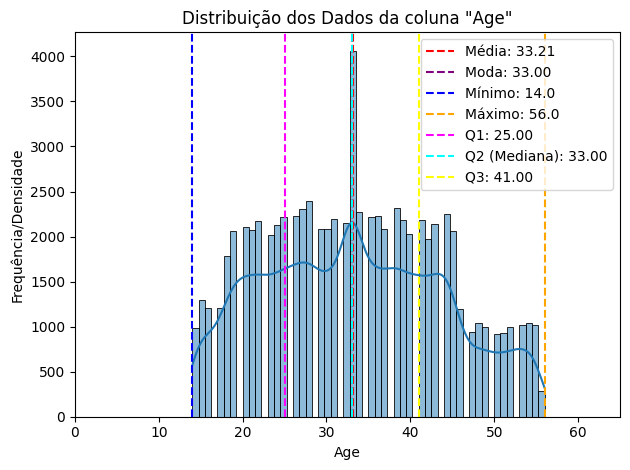

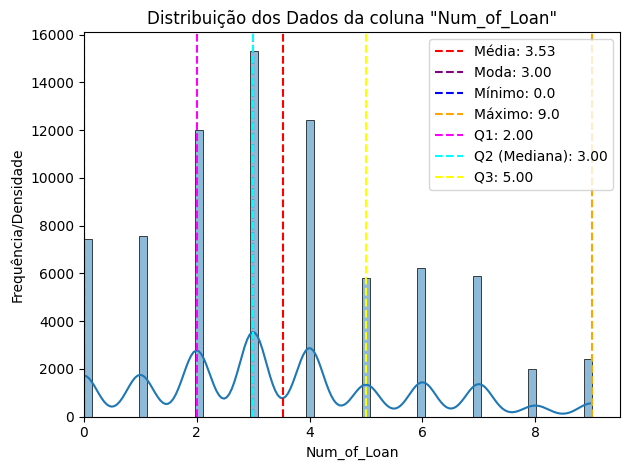

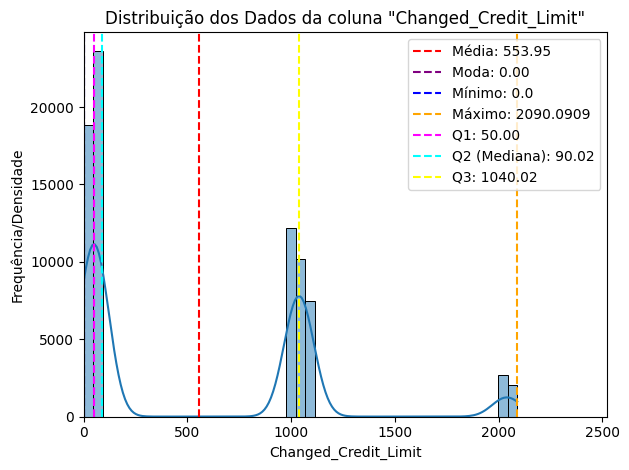

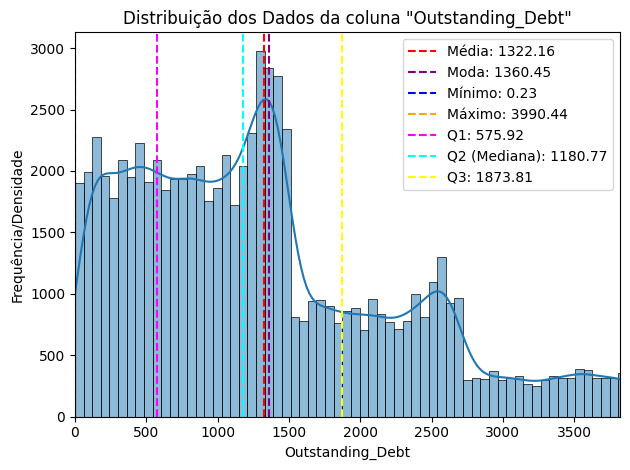

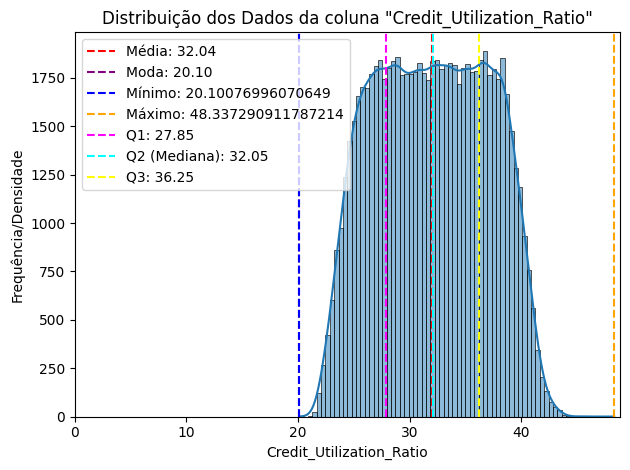

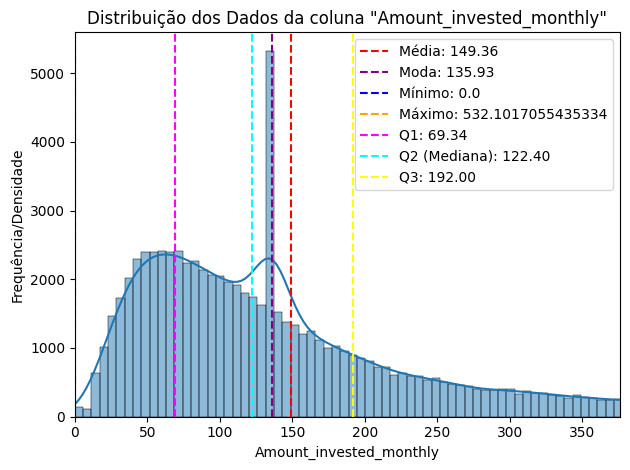

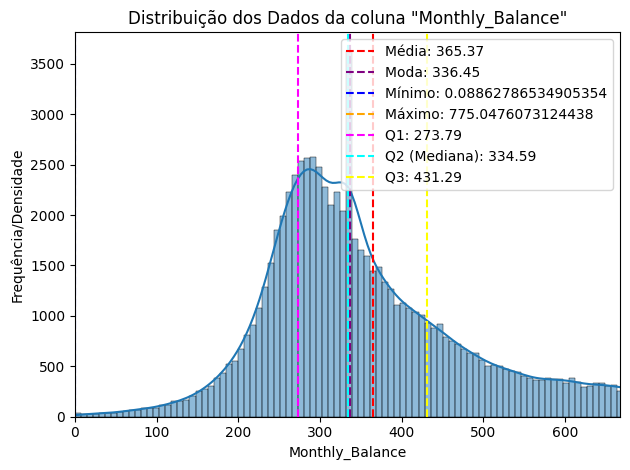

In [61]:
plot_distribuicao(colunas_float)

⚠️ Colunas com outliers relevantes: Total_EMI_per_month, Num_Credit_inquiries, Interest_Rate, Num_Credit_Cards, Num_Bank_Accounts.
Observações:
1. Na coluna "Delay for Due Date" temos um número negativo como mínimo, isso leva a pensar que são pessoas que pagam antes do vencimento das dívidas, este fato pode ocorrer por praticidade da pessoa ou por vantagens em padar dívidas antes do vencimento, como por exemplo ganhae desconto. Para o score, o quanto mais relevante é a pessoa que paga antes da data e a pessoa que paga na data?
Isso é importante ser esclarecido pois em um modelo de previsão, caso não seja relevante a pessoa que pague antes, o modelo de previsão sempre tender a dar uma nota melhor para aqueles que pagam antes.
* Resposta: Segundo o [site do serasa](https://www.serasa.com.br/score/blog/antecedencia-ajuda-no-score/), não há diferença em relação a pontuação em quem paga antes do vencimento e quem paga na data de vencimento.
* 🔰 **Ação: Tudo que é negativo nessa pontuação, será igualado a 0.**
2. É possível ver na distruibuição Monthly_Inhand_Salary	diferentes topos, o que torna interessante ver essa distruibuição classificada de acordo com o target.



###3.1.2 Valores Discretos

Para análise dos Valores discretos é necessário agrupar em intervalos para ser possível ter uma melhor visualização.


A distribuição de frequência é uma tabela que resume a distribuição dos dados em intervalos ou categorias discretas, mostrando a frequência de cada intervalo. O cálculo envolve alguns passos principais:

Determinação dos Intervalos (Bins): O primeiro passo é determinar os intervalos nos quais os dados serão agrupados. Esses intervalos são chamados de "bins" ou "classes". Uma regra comum para determinar o número de bins é a Regra de Sturges, que calcula o número de bins (k) como 1 + log⁡2(n), onde n é o número de observações.

Agrupamento dos Dados nos Intervalos: Os dados são então agrupados nos intervalos definidos. Isso é feito utilizando algum método de discretização, como o utilizado na função KBinsDiscretizer do scikit-learn neste exemplo.

Contagem de Frequência: Para cada intervalo, é contado quantas observações (ou dados) pertencem a esse intervalo. A tabela de distribuição de frequência terá uma coluna para os intervalos e outra para a contagem de frequência.

Frequência Relativa: A frequência relativa é a proporção da contagem de frequência em relação ao total de observações. É calculada dividindo-se a contagem de frequência pelo número total de observações.

In [62]:
def calculate_num_intervals(data_size):
    """
    Calcula o número de intervalos usando a Regra de Sturges.

    Parâmetros:
    - data_size: Número de observações no conjunto de dados.

    Retorna:
    - Número de intervalos calculado.
    """
    return int(np.ceil(1 + np.log2(data_size)))

def plot_equifrequent_distribution(data):
    """
    Para cada coluna do tipo inteiro em um DataFrame, realiza uma distribuição equifrequente
    e plota um gráfico de barras desses intervalos.

    Parâmetros:
    - data: DataFrame do pandas contendo os dados.

    Retorna:
    - None (mostra os gráficos).
    """
    # Filtra colunas do tipo inteiro
    int_columns = data.select_dtypes(include='int').columns

    if not int_columns.any():
        print("Nenhuma coluna do tipo inteiro encontrada. Saindo.")
        return

    # Itera sobre as colunas inteiras
    for column_name in int_columns:
        # Filtra a coluna desejada
        column_data = data[column_name]

        # Calcula o número de intervalos com base no tamanho da amostra
        num_intervals = calculate_num_intervals(len(column_data))

        # Realiza a discretização equifrequente
        bins, interval_labels = pd.qcut(column_data, q=num_intervals, labels=False, duplicates='drop', retbins=True)

        # Calcula as frequências automaticamente
        frequencies = pd.cut(column_data, bins=interval_labels).value_counts().sort_index()

        # Gera o gráfico de barras
        plt.figure(figsize=(10, 6))
        frequencies.plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title(f'Distribuição Equifrequente de {column_name}')
        plt.xlabel(f'Intervalo (Equifrequente)')
        plt.ylabel('Frequência')

        # Adiciona rótulos para cada barra
        for i, count in enumerate(frequencies):
            plt.text(i, count, str(count), ha='center', va='bottom')

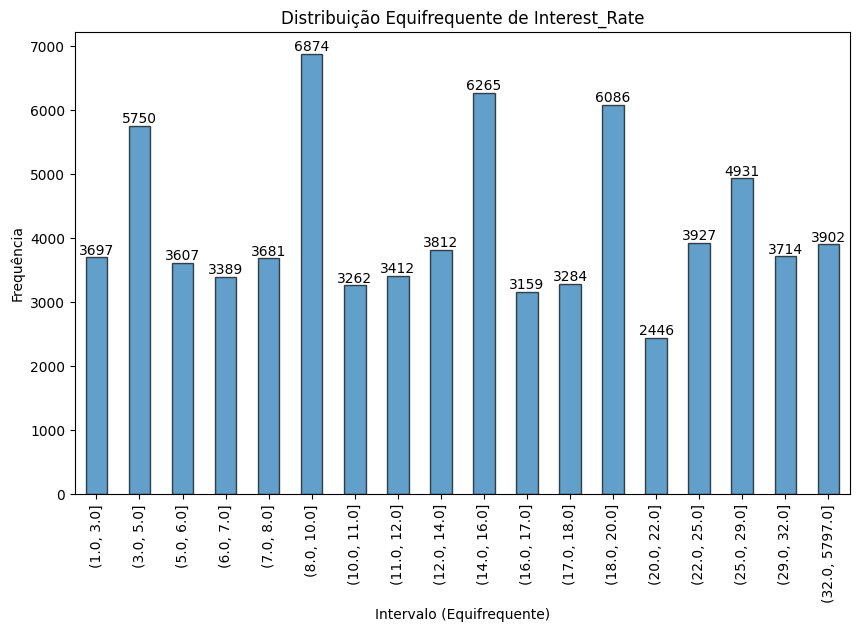

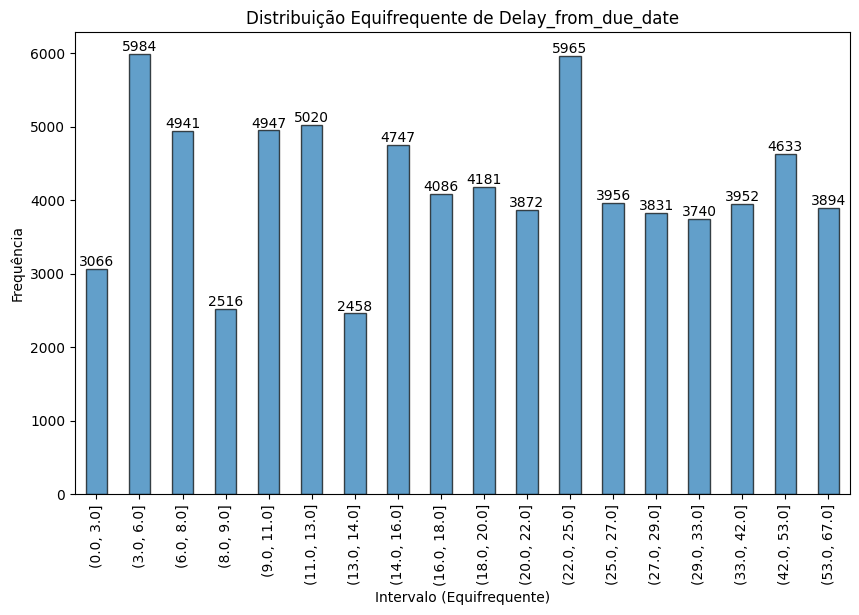

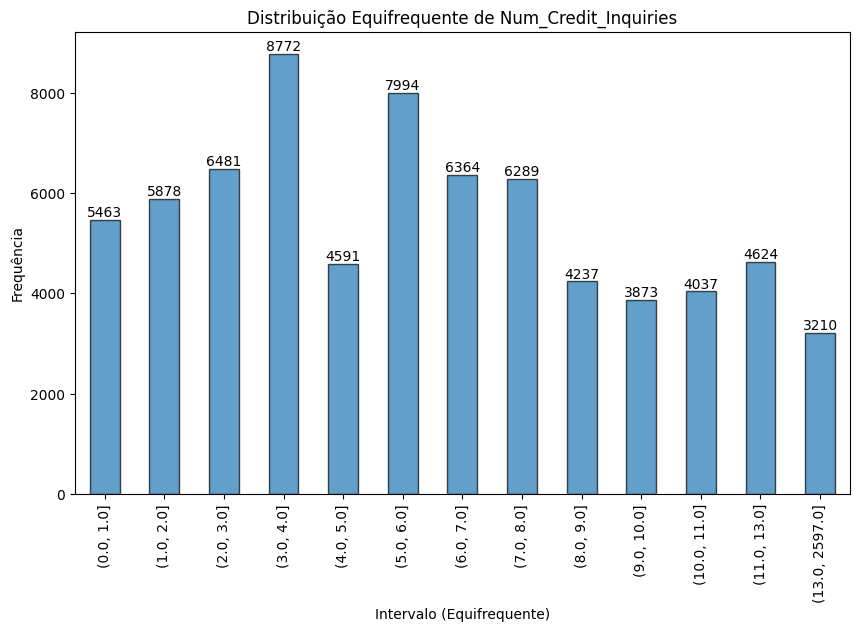

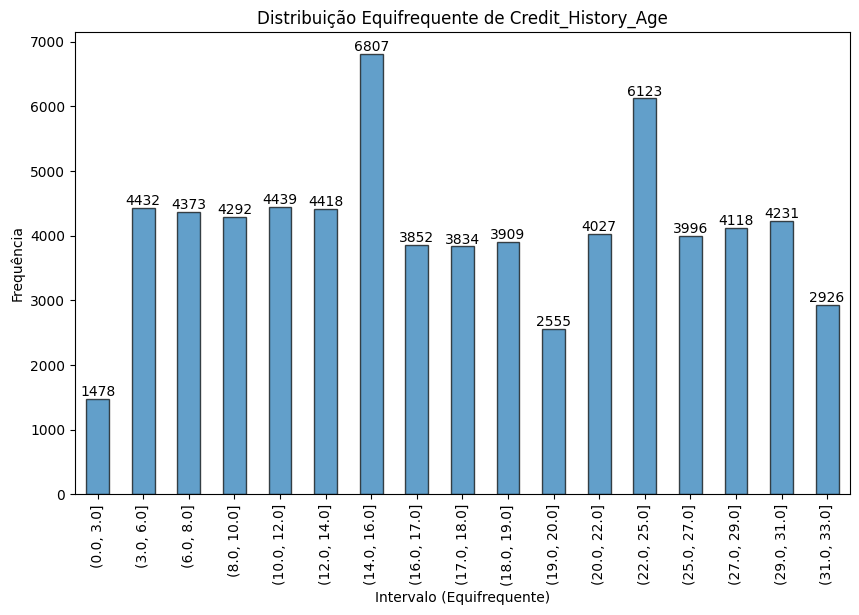

In [63]:
plot_equifrequent_distribution(dataset)

##3.2 Valores categóricos.



In [64]:
def plot_cat_values(data):
    """
    Plota gráficos de barras para mostrar as diferentes categorias e suas frequências em colunas discretas.

    Parâmetros:
    - data: DataFrame do pandas contendo os dados.
    """
    for column_name in data.columns:
        # Verifica se a coluna é de tipo inteiro ou objeto
        if data[column_name].dtype == 'object':
            # Contagem de frequência dos valores discretos
            value_counts = data[column_name].value_counts()

            # Configuração do gráfico
            plt.figure(figsize=(24, 6))
            sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

            # Adiciona rótulos e título
            plt.xlabel(column_name)
            plt.ylabel('Frequência')
            plt.title(f'Distribuição de Frequência de {column_name}')

            # Exibe o gráfico
            plt.show()

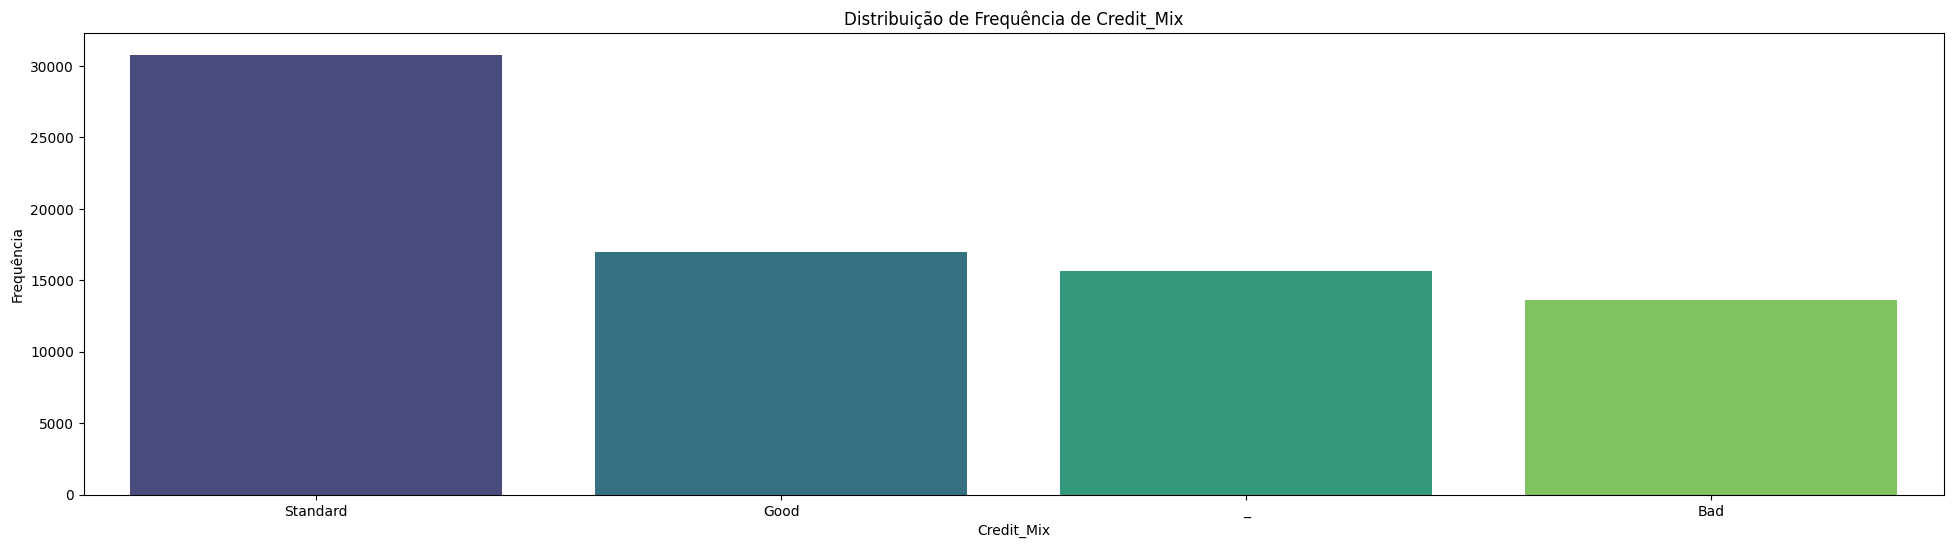

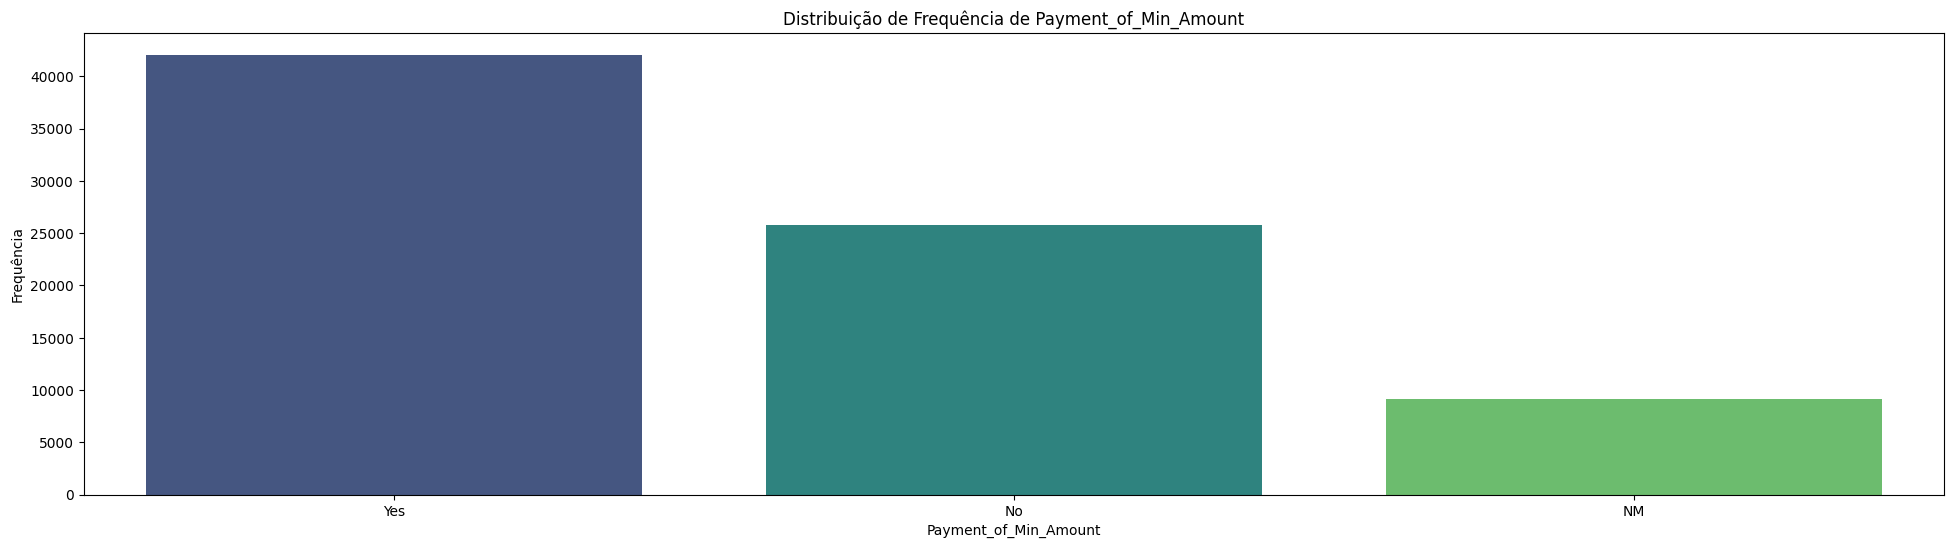

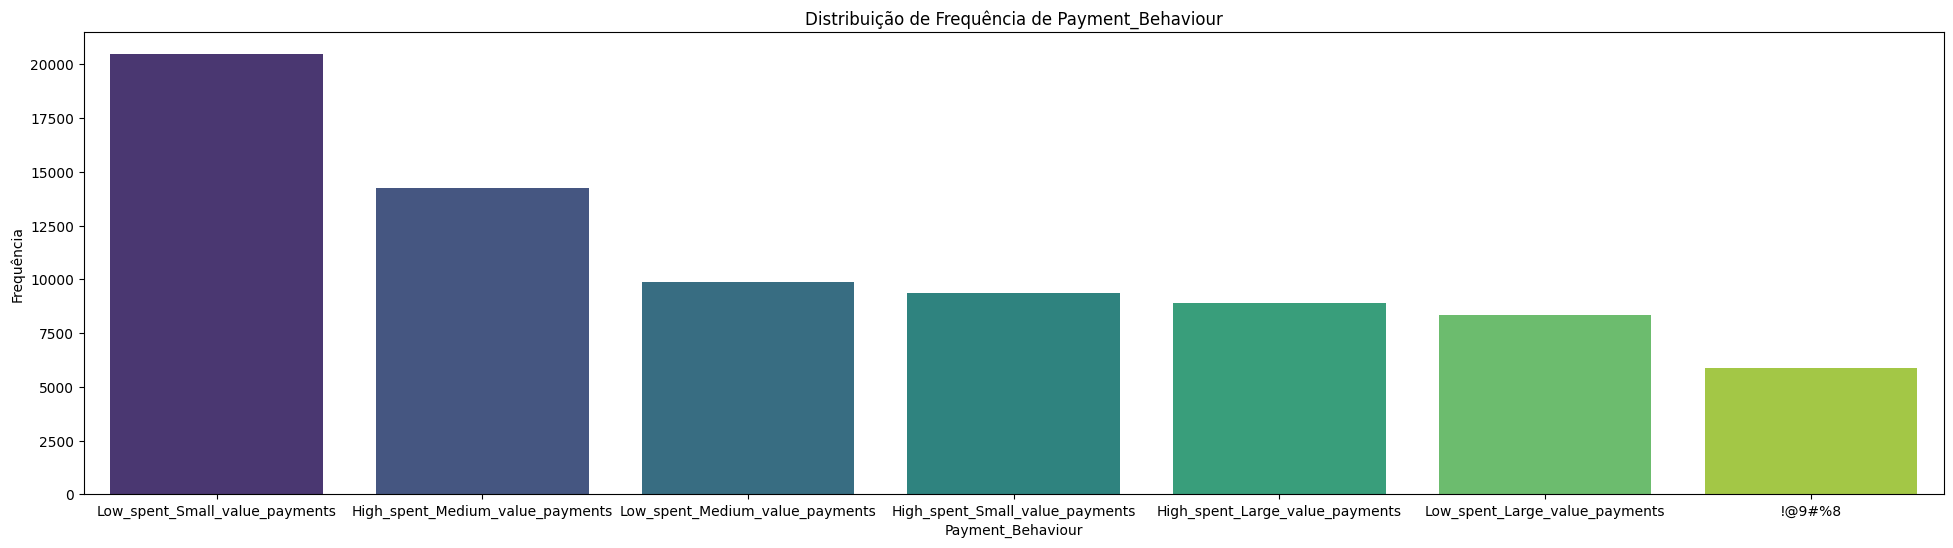

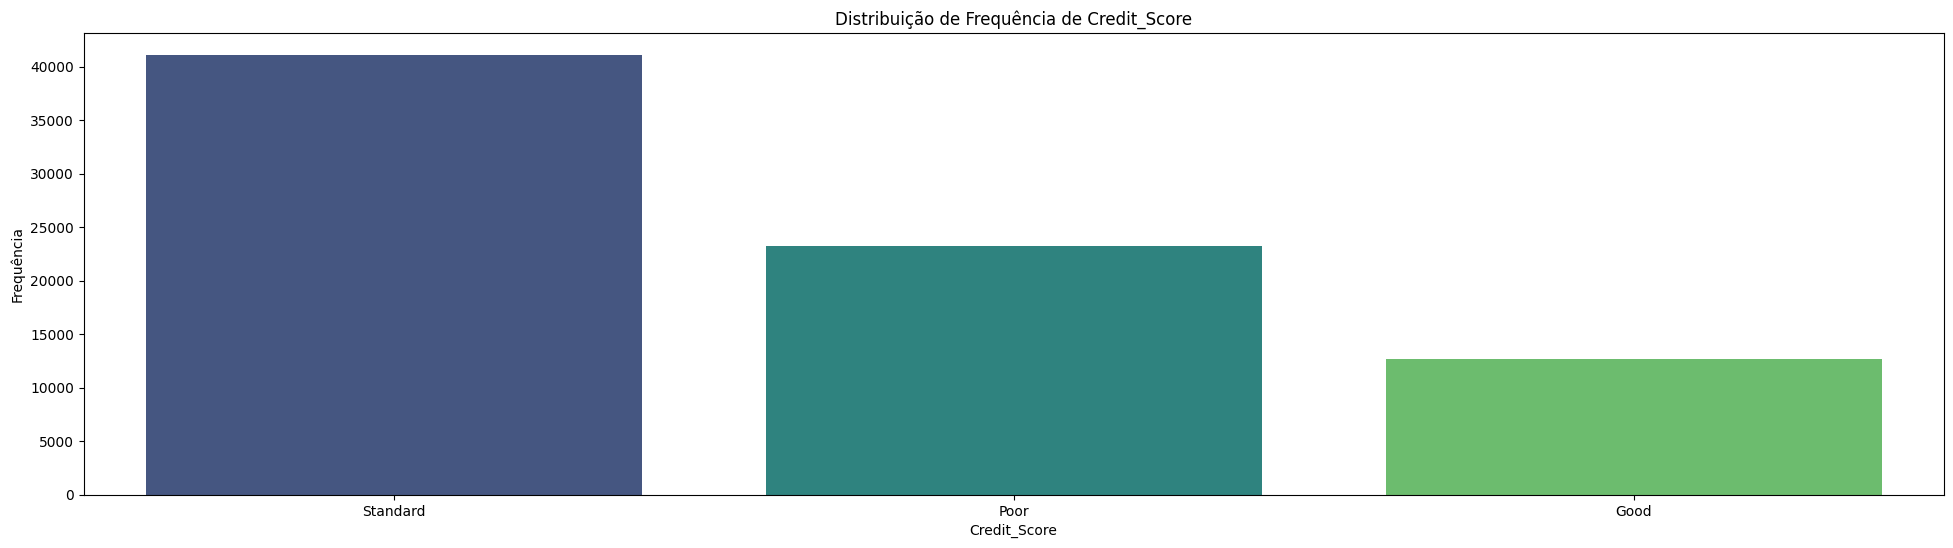

In [65]:
plot_cat_values(dataset)

Payment_of_Min_Amount tem o valor NM que provavelmente deveria ser "No"

In [66]:
dataset['Payment_of_Min_Amount'] = dataset['Payment_of_Min_Amount'].str.replace("NM", 'No')

#4. Correlação

A correlação de Pearson mede a força e a direção de uma relação linear entre duas variáveis contínuas.
Varia de -1 a 1:
1 indica uma correlação positiva perfeita (à medida que uma variável aumenta, a outra também aumenta de maneira linear).
-1 indica uma correlação negativa perfeita (à medida que uma variável aumenta, a outra diminui de maneira linear).
0 indica nenhuma correlação linear.


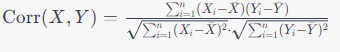

In [67]:
# Calculando a correlação
def correlacao_dataframe(dataset):
    """
    Calcula e exibe a matriz de correlação entre colunas numéricas e categóricas convertidas.

    Parâmetros:
    - dataset: DataFrame do pandas contendo os dados.

    Retorna:
    - None (mostra o mapa de calor).
    """
    # Copia o DataFrame para evitar modificar o original
    df = dataset.copy()

    # Filtra apenas as colunas do tipo 'object'
    colunas_object = df.select_dtypes(include=['object']).columns.tolist()

    # Converte as colunas 'object' para valores numéricos
    for coluna in colunas_object:
        df[coluna] = pd.Categorical(df[coluna]).codes

    # Calcula a matriz de correlação
    correlacao = df.corr()

    # Cria um mapa de calor (heatmap) usando seaborn
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Mapa de Calor - Correlação entre Variáveis')
    plt.show()

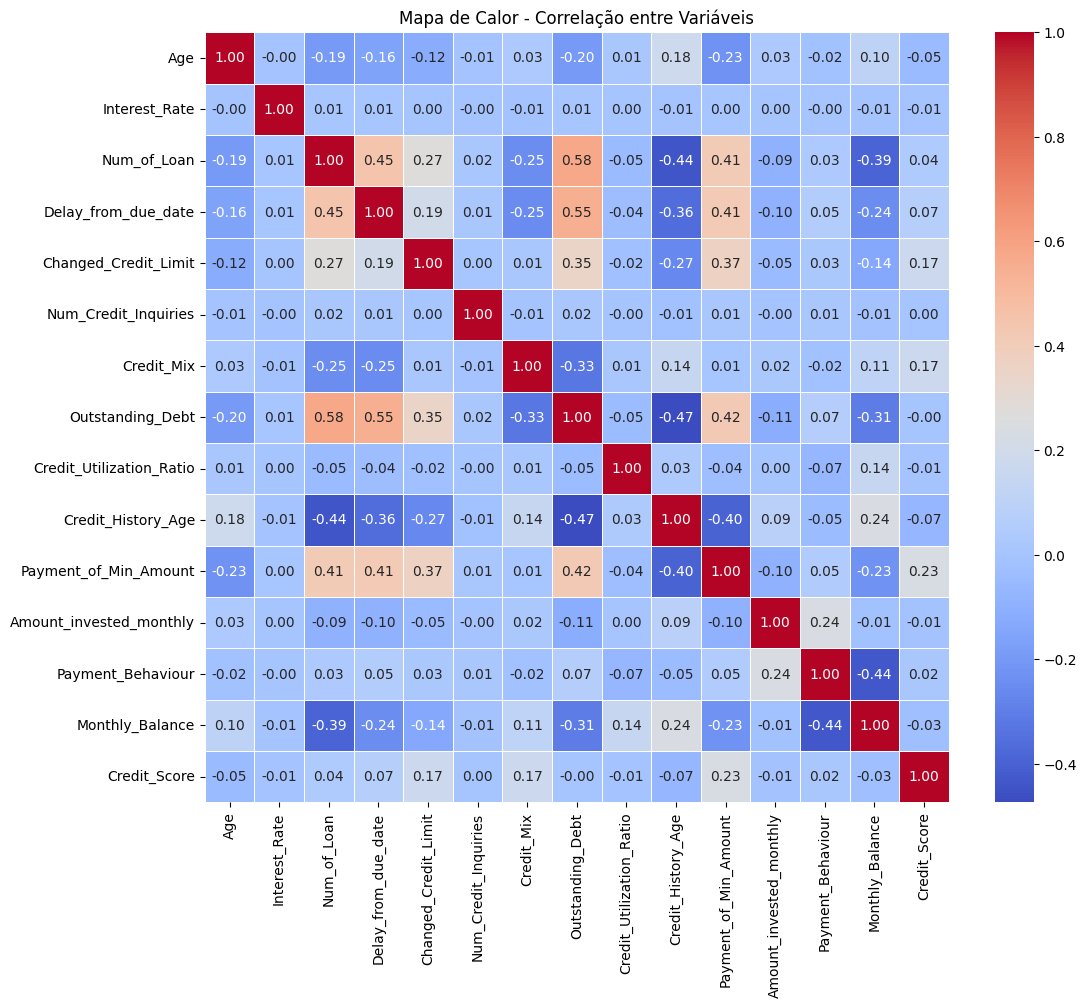

In [68]:
correlacao_dataframe(dataset)

Serão considerados as seguintes colunas: Age, Num_of_Loan, Delay_from_due_date, Changed_Credit_Limit, Credit_Mix, Credit_History_Age, Payment_of_Min_Amount, Monthly_Balance. As demais possuem uma correlação muito baixa.

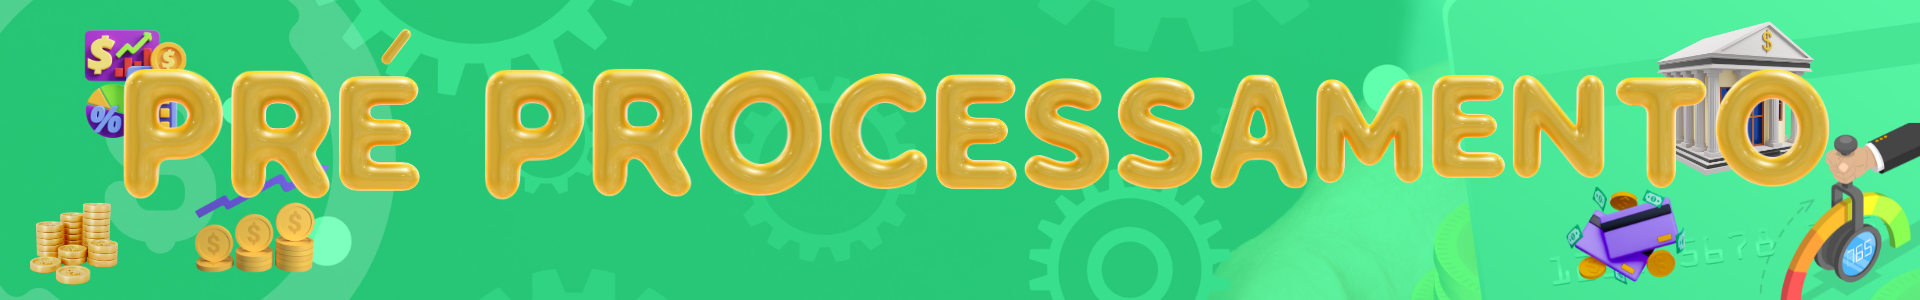

# 5. Dividir o conjunto de dados

In [69]:
categoria_map = {'Poor': 1, 'Standard': 2, 'Good': 3}
dataset['Credit_Score_num'] = dataset['Credit_Score'].map(categoria_map)

In [84]:
# Separar features (X) e target (y)
X = dataset.drop('Credit_Score', axis=1)
X = dataset.drop('Credit_Score_num', axis=1)
features = X.columns.tolist()
y = dataset['Credit_Score']
y.replace({'Poor': '1', 'Standard': '2', 'Good': '3'})

# Dividir o conjunto de dados em treinamento e teste
# O parâmetro test_size define a proporção do conjunto de teste (20% neste exemplo)
# O parâmetro random_state é usado para garantir a reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Agora, você pode usar X_train e y_train para treinar o modelo
# E X_test e y_test para avaliar o desempenho do modelo

#6. Equilibrando as classes
Isso deve ser feito no conjunto de dados de treino para evitar vazamento de dados

In [71]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

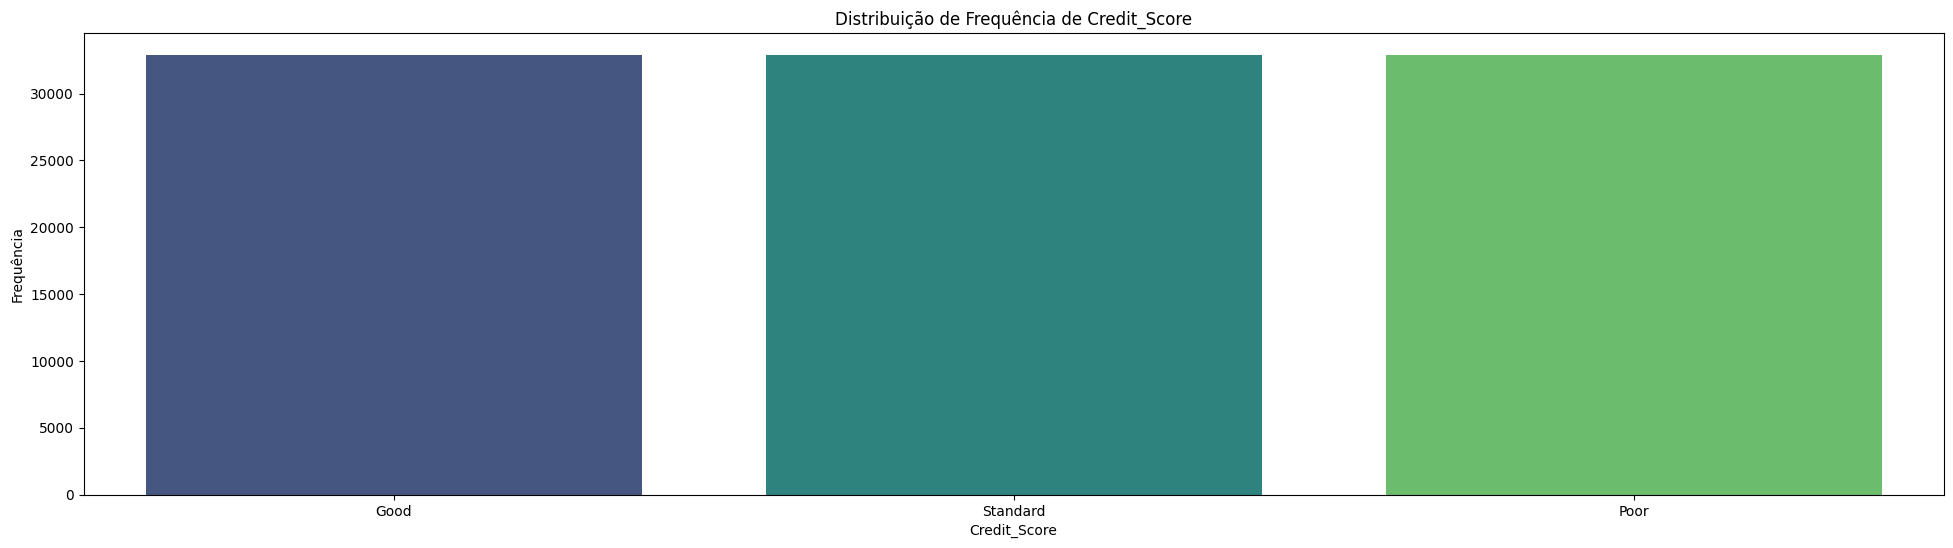

In [72]:
plot_cat_values(y_train_resampled.to_frame())

#7. Pipeline de harmonização dos dados

In [73]:
from sklearn import set_config

# Ajusta o estilo do pipeline para visualização
set_config(display='diagram')

def preprocess_data(df):
    # Selecionar colunas numéricas e categóricas
    colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    colunas_categoricas = df.select_dtypes(include=['object']).columns

    # Criar transformador para colunas numéricas
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar transformador para colunas categóricas
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))
    ])

    # Combinar transformadores usando ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, colunas_numericas),
            ('cat', categorical_transformer, colunas_categoricas)
        ])

    # Criar o pipeline final
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Aplicar a transformação ao DataFrame
    df_preprocessado = pd.DataFrame(pipeline.fit_transform(df))

    return df_preprocessado

In [74]:
X_train = preprocess_data(X_train_resampled)

In [75]:
X_test = preprocess_data(X_test)

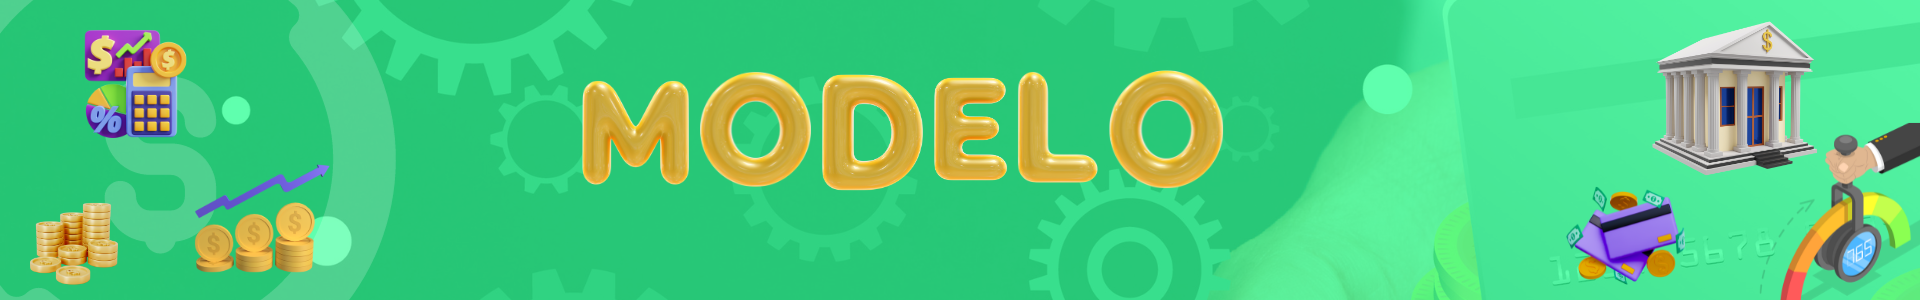

Modelo escolhido será o do randon forest, pois é um modelo que pode ser aplicado a predição de categoria e é razoavelemente mais fácil de inteligir

In [76]:
rf_model = RandomForestClassifier( n_estimators=10,
    max_depth=3,           # Limite a profundidade da árvore
    min_samples_split=5,   # Número mínimo de amostras necessárias para dividir um nó interno
    min_samples_leaf=2,    # Número mínimo de amostras necessárias para ser um nó folha
    random_state=42)
rf_model.fit(X_train, y_train_resampled)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=10, random_state=42)

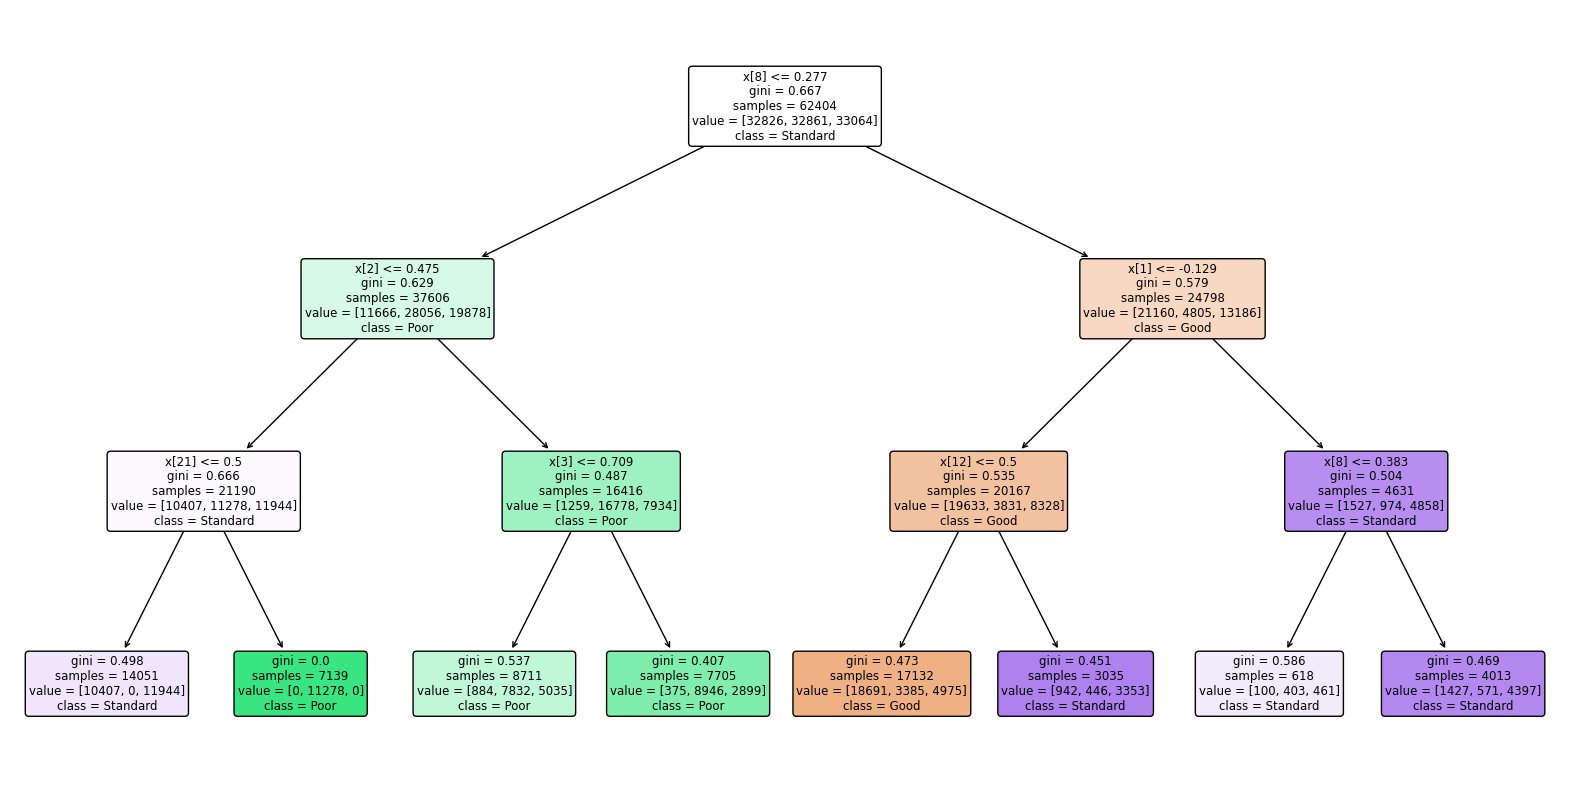

In [93]:
# Escolha uma das árvores na floresta aleatória (por exemplo, a primeira árvore)
tree_to_plot = 9

# Visualize a árvore
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[tree_to_plot], filled=True, feature_names=None, class_names=rf_model.classes_, rounded=True)
plt.show()

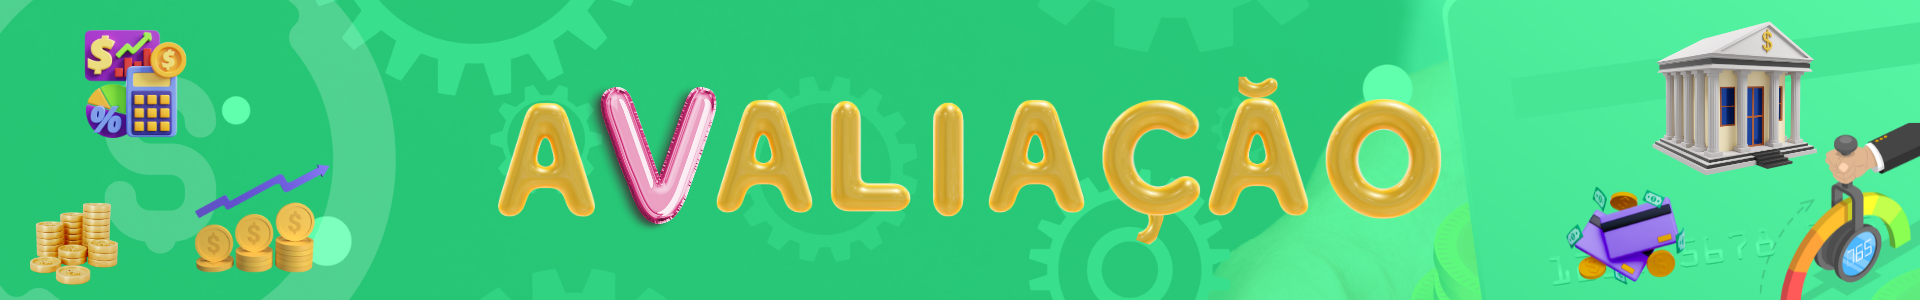

In [78]:
y_pred = rf_model.predict(X_test)

# Avalie o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.95

Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.81      0.95      0.87      2607
        Poor       0.98      0.87      0.92      4594
    Standard       0.99      1.00      1.00      8214

    accuracy                           0.95     15415
   macro avg       0.93      0.94      0.93     15415
weighted avg       0.96      0.95      0.95     15415


Matriz de Confusão:
[[2468  101   38]
 [ 578 4012    4]
 [   0    0 8214]]


Pode-se notar que alcaçamos uma boa acurácia, sempre buscando não deixar haverem vazamentos de dados e prezando pela qualidade dos dados